In [1]:
import pandas as pd
import polars as pl
import numpy as np

In [2]:
data_path = './00_project_2/project_2_data'

In [3]:
data = pd.read_parquet(f'{data_path}/sales_data.parquet')
data.head()

item_id  dept_id cat_id store_id  \
date       id                                                                  
2013-01-01 FOODS_1_004_TX_1_evaluation  FOODS_1_004  FOODS_1  FOODS     TX_1   
           FOODS_1_004_TX_2_evaluation  FOODS_1_004  FOODS_1  FOODS     TX_2   
           FOODS_1_004_TX_3_evaluation  FOODS_1_004  FOODS_1  FOODS     TX_3   
           FOODS_1_005_TX_2_evaluation  FOODS_1_005  FOODS_1  FOODS     TX_2   
           FOODS_1_009_TX_2_evaluation  FOODS_1_009  FOODS_1  FOODS     TX_2   

                                       state_id  sales  
date       id                                           
2013-01-01 FOODS_1_004_TX_1_evaluation       TX     20  
           FOODS_1_004_TX_2_evaluation       TX     20  
           FOODS_1_004_TX_3_evaluation       TX      4  
           FOODS_1_005_TX_2_evaluation       TX      1  
           FOODS_1_009_TX_2_evaluation       TX      3

In [4]:
# dir(pl.col('*'))

In [5]:
# QUESTION: filter out products that don't have sales using cumsum

data = (
    data
    [
        data.
        groupby(['date', 'id'])
        .cumsum(numeric_only=True)
        .sales>0
    ]
)

In [6]:
data.shape

(3895938, 6)

In [7]:
df_pl = pl.from_pandas(data.reset_index())

In [8]:
display(df_pl.head())

date,id,item_id,dept_id,cat_id,store_id,state_id,sales
datetime[ns],cat,str,str,str,str,str,i64
2013-01-01 00:00:00,"""FOODS_1_004_TX…","""FOODS_1_004""","""FOODS_1""","""FOODS""","""TX_1""","""TX""",20
2013-01-01 00:00:00,"""FOODS_1_004_TX…","""FOODS_1_004""","""FOODS_1""","""FOODS""","""TX_2""","""TX""",20
2013-01-01 00:00:00,"""FOODS_1_004_TX…","""FOODS_1_004""","""FOODS_1""","""FOODS""","""TX_3""","""TX""",4
2013-01-01 00:00:00,"""FOODS_1_005_TX…","""FOODS_1_005""","""FOODS_1""","""FOODS""","""TX_2""","""TX""",1
2013-01-01 00:00:00,"""FOODS_1_009_TX…","""FOODS_1_009""","""FOODS_1""","""FOODS""","""TX_2""","""TX""",3


In [9]:
prices_df_pl = pl.read_parquet('./00_project_2/project_2_data/prices.parquet')
events_df_pl = pl.read_parquet('./00_project_2/project_2_data/calendar.parquet')

display(prices_df_pl.head())
display(events_df_pl.head())

store_id,item_id,sell_price,date
str,str,f64,datetime[ns]
"""TX_1""","""HOBBIES_1_001""",9.58,2013-07-13 00:00:00
"""TX_1""","""HOBBIES_1_001""",9.58,2013-07-14 00:00:00
"""TX_1""","""HOBBIES_1_001""",9.58,2013-07-15 00:00:00
"""TX_1""","""HOBBIES_1_001""",9.58,2013-07-16 00:00:00
"""TX_1""","""HOBBIES_1_001""",9.58,2013-07-17 00:00:00


snap_TX,event_name_1,event_type_1,event_name_2,event_type_2,date
i64,str,str,str,str,datetime[ns]
0,null,null,null,null,2011-01-29 00:00:00
0,null,null,null,null,2011-01-30 00:00:00
0,null,null,null,null,2011-01-31 00:00:00
1,null,null,null,null,2011-02-01 00:00:00
0,null,null,null,null,2011-02-02 00:00:00


In [10]:
df_pl.dtypes

[Datetime(time_unit='ns', time_zone=None),
 Categorical,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Utf8,
 Int64]

In [11]:
np.iinfo(np.int8)

iinfo(min=-128, max=127, dtype=int8)

In [12]:
(
    df_pl
    .select(pl.all().exclude(pl.Categorical, pl.Date, pl.Utf8))
    .select(pl.all().max())
)

date,sales
datetime[ns],i64
2016-05-22 00:00:00,626


In [13]:
# %timeit
df_pl = (
    df_pl
    .lazy()
    .join(prices_df_pl.lazy(), on=['date', 'store_id', 'item_id'], how='left')
    .join(events_df_pl.lazy(), on=['date'], how='left')
    .with_columns(
        pl.col('date').dt.date(),
        pl.col('sales').cast(pl.Int16),
        pl.col('sell_price').cast(pl.Int32),
        pl.col(r'^snap.*$').cast(pl.Boolean),
        pl.col(r'^event.*$').cast(pl.Categorical)
    )
    .collect(streaming=True)
)

In [14]:
dir(pl.col('*').arr)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accessor',
 '_pyexpr',
 'max',
 'min',
 'sum',
 'unique']

In [113]:
from sklearn.preprocessing import OrdinalEncoder

data = df_pl

def feature_engineering(data, by_day_of_week=False):

    df = data.clone()
    
    group_cols = ['id']
    if by_day_of_week: group_cols.append('day_of_week')
    
    cont_feats = [] 
    cat_feats = ['id','item_id','dept_id','cat_id','store_id','state_id',
                 'snap_TX',
                 'event_name_1','event_name_2', 
                 'event_type_1', 'event_type_2']
    
    lags = [7, 30, 90]
    rolling_features = [7, 30 ,90]
    
    # Date features
    df = (
        df
        .lazy()
        .with_columns(
            pl.col('date').dt.weekday().alias('day_of_week'),
            pl.col('date').dt.month().alias('month'),
            pl.col('date').dt.year().alias('year'),
            pl.col('date').dt.day().alias('day_of_month')
        )
        .collect(streaming=True)
    )
    
    cont_feats += ['day_of_week', 'day_of_month', 'month', 'year']
    
    # Shift sales & sell_price
    df = (
            df
            .lazy()
            .with_columns(
                pl.col('sales')
                .shift(periods=28)
                .over(pl.col('id')),
                
                pl.col('sell_price')
                .shift(periods=28)
                .over(pl.col('id'))
            )
            .collect(streaming=True)
        )
    
    
    # Calculate lag features
    for lag in lags:
        
        lag_feature = f"lag_{lag}_{28}"
        
        df = (
            df
            .lazy()
            .with_columns(
                pl.col('sales')
                .shift(periods=lag)
                .over(pl.col('id'))
                .alias(lag_feature)
            )
            .collect(streaming=True)
        )
        
        cont_feats.append(lag_feature)
        
    
    # df_rolling = df.clone().select(pl.col(['date', 'sales'] + group_cols))
    for rolling_feature in rolling_features:
        
        rolling_mean_feature = f"seasonal_rolling_mean_{rolling_feature}" if by_day_of_week else f"rolling_mean_{rolling_feature}_{28}"
        
        rolling_std_feature = f"seasonal_rolling_std_{rolling_feature}" if by_day_of_week else f"rolling_std_{rolling_feature}_{28}"
        
        df = (
            df
            .lazy()
            .with_columns(
                pl.col('sales')
                .rolling_mean(
                    window_size=rolling_feature, 
                    min_periods=1, 
                    closed='right'
                )
                .over(group_cols)
                .alias(rolling_mean_feature),
                
                pl.col('sales')
                .rolling_std(
                    window_size=rolling_feature, 
                    min_periods=1, 
                    closed='right'
                )
                .over(group_cols)
                .alias(rolling_std_feature)
            )
            .collect(streaming=True)
        )
        
        cont_feats += [rolling_mean_feature, rolling_std_feature]
    
    enc_cat_feats = [f'{feat}_enc' for feat in cat_feats] 
    
    df[enc_cat_feats] = OrdinalEncoder().fit_transform(df[cat_feats])
    
    train = (df
            #  .lazy()
             .filter(pl.col('date') < (pl.col('date').max() - pl.duration(days=28)))
            #  .collect(streaming=True)
             )
    
    val = (df
        #    .lazy()
           .filter(pl.col('date') >= (pl.col('date').max() - pl.duration(days=28)))
        #    .collect(streaming=True)
           )
    
    # Price features
    train = (
        train
        .lazy()
        .with_columns(
            pl.col('sell_price').mean().over(pl.col('item_id')).alias('avg_sell_price_by_item_id'),
            pl.col('sell_price').max().over(pl.col('item_id')).alias('max_sell_price_by_item_id'),
            pl.col('sell_price').min().over(pl.col('item_id')).alias('min_sell_price_by_item_id'),
            pl.col('sell_price').mean().over(pl.col('dept_id')).alias('avg_sell_price_by_dept_id'),
            pl.col('sell_price').max().over(pl.col('dept_id')).alias('max_sell_price_by_dept_id'),
            pl.col('sell_price').min().over(pl.col('dept_id')).alias('min_sell_price_by_dept_id'),
            pl.col('sell_price').mean().over(pl.col('cat_id')).alias('avg_sell_price_by_cat_id'),
            pl.col('sell_price').max().over(pl.col('cat_id')).alias('max_sell_price_by_cat_id'),
            pl.col('sell_price').min().over(pl.col('cat_id')).alias('min_sell_price_by_cat_id')
        )
        .collect(streaming=True)
    )
    
    cont_feats += (['avg_sell_price_by_item_id', 
                       'max_sell_price_by_item_id', 
                       'min_sell_price_by_item_id',
                       'avg_sell_price_by_dept_id',
                       'max_sell_price_by_dept_id',
                       'min_sell_price_by_dept_id',
                       'avg_sell_price_by_cat_id',
                       'max_sell_price_by_cat_id',
                       'min_sell_price_by_cat_id'])
    
    # Agg features
    train = (
        train
        .lazy()
        .with_columns(
            pl.col('sales').mean().over(pl.col('item_id')).alias('avg_sales_price_by_item_id'),
            pl.col('sales').max().over(pl.col('item_id')).alias('max_sales_price_by_item_id'),
            pl.col('sales').min().over(pl.col('item_id')).alias('min_sales_price_by_item_id'),
            pl.col('sales').mean().over(pl.col('dept_id')).alias('avg_sales_price_by_dept_id'),
            pl.col('sales').max().over(pl.col('dept_id')).alias('max_sales_price_by_dept_id'),
            pl.col('sales').min().over(pl.col('dept_id')).alias('min_sales_price_by_dept_id'),
            pl.col('sales').mean().over(pl.col('cat_id')).alias('avg_sales_price_by_cat_id'),
            pl.col('sales').max().over(pl.col('cat_id')).alias('max_sales_price_by_cat_id'),
            pl.col('sales').min().over(pl.col('cat_id')).alias('min_sales_price_by_cat_id')

        )
        .collect(streaming=True)
    )
    
    cont_feats += (['avg_sales_price_by_item_id',
                       'max_sales_price_by_item_id',
                       'min_sales_price_by_item_id',
                       'avg_sales_price_by_dept_id',
                       'max_sales_price_by_dept_id',
                       'min_sales_price_by_dept_id',
                       'avg_sales_price_by_cat_id',
                       'max_sales_price_by_cat_id',
                       'min_sales_price_by_cat_id'])
    
    train_cols_to_include = (['id'] + 
    
                            ['avg_sell_price_by_item_id', 
                            'max_sell_price_by_item_id', 
                            'min_sell_price_by_item_id',
                            'avg_sell_price_by_dept_id',
                            'max_sell_price_by_dept_id',
                            'min_sell_price_by_dept_id',
                            'avg_sell_price_by_cat_id',
                            'max_sell_price_by_cat_id',
                            'min_sell_price_by_cat_id'] +
                            
                            ['avg_sales_price_by_item_id',
                            'max_sales_price_by_item_id',
                            'min_sales_price_by_item_id',
                            'avg_sales_price_by_dept_id',
                            'max_sales_price_by_dept_id',
                            'min_sales_price_by_dept_id',
                            'avg_sales_price_by_cat_id',
                            'max_sales_price_by_cat_id',
                            'min_sales_price_by_cat_id'])
                                
    val = (
        val
        .lazy()
        .join(train
              .lazy()
              .select(pl.col(train_cols_to_include))
              .unique(), 
              on=['id'], 
              how='left', 
              suffix='_val')
        .collect(streaming=True)
    )
    
    features = []
    features = cont_feats + enc_cat_feats
    
    return train, val, features

In [114]:
train, val, features = feature_engineering(df_pl)

In [144]:
train = (
    train
    .lazy()
    .with_columns(pl.col('sales').is_null().alias('is_null_sales'))
    .filter(pl.col('is_null_sales') == False)
    .collect(streaming=True)
)

In [145]:
# feature_engineering(data)

display(train.shape)
display(val.shape)
display(features)

(3528888, 57)

(111135, 56)

['day_of_week',
 'day_of_month',
 'month',
 'year',
 'lag_7_28',
 'lag_30_28',
 'lag_90_28',
 'rolling_mean_7_28',
 'rolling_std_7_28',
 'rolling_mean_30_28',
 'rolling_std_30_28',
 'rolling_mean_90_28',
 'rolling_std_90_28',
 'avg_sell_price_by_item_id',
 'max_sell_price_by_item_id',
 'min_sell_price_by_item_id',
 'avg_sell_price_by_dept_id',
 'max_sell_price_by_dept_id',
 'min_sell_price_by_dept_id',
 'avg_sell_price_by_cat_id',
 'max_sell_price_by_cat_id',
 'min_sell_price_by_cat_id',
 'avg_sales_price_by_item_id',
 'max_sales_price_by_item_id',
 'min_sales_price_by_item_id',
 'avg_sales_price_by_dept_id',
 'max_sales_price_by_dept_id',
 'min_sales_price_by_dept_id',
 'avg_sales_price_by_cat_id',
 'max_sales_price_by_cat_id',
 'min_sales_price_by_cat_id',
 'id_enc',
 'item_id_enc',
 'dept_id_enc',
 'cat_id_enc',
 'store_id_enc',
 'state_id_enc',
 'snap_TX_enc',
 'event_name_1_enc',
 'event_name_2_enc',
 'event_type_1_enc',
 'event_type_2_enc']

In [146]:
train = train.to_pandas().set_index(['date', 'id'])
val = val.to_pandas().set_index(['date', 'id'])   

In [147]:
import lightgbm as lgb

# some parameters to play around with. Not the best by any means!
params = dict(
    objective='tweedie',
    tweedie_variance_power=1.1,
    learning_rate=0.05,
    min_samples_leaf=100,
    subsample=0.3,
    feature_fraction=0.3,
    deterministic=True,
)

# train, val, features = feature_engineering(data)

train_dset = lgb.Dataset(
    train[features], 
    train['sales'],
)

val_dset = lgb.Dataset(
    val[features], 
    val['sales'],
)

callbacks = [
    lgb.early_stopping(100),
    lgb.log_evaluation(50)
]

model = lgb.train(
    params, 
    train_dset,
    num_boost_round=1000,
    valid_sets=[val_dset],
    callbacks=callbacks,
)

preds = model.predict(val[features])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3236
[LightGBM] [Info] Number of data points in the train set: 3528888, number of used features: 37
[LightGBM] [Info] Start training from score 1.224527
Training until validation scores don't improve for 100 rounds
[50]	valid_0's tweedie: 28.9616
[100]	valid_0's tweedie: 28.9472
[150]	valid_0's tweedie: 28.9429
[200]	valid_0's tweedie: 28.9402
[250]	valid_0's tweedie: 28.9392
[300]	valid_0's tweedie: 28.9385
[350]	valid_0's tweedie: 28.9381
[400]	valid_0's tweedie: 28.9378
[450]	valid_0's tweedie: 28.9376
[500]	valid_0's tweedie: 28.9374
[550]	valid_0's tweedie: 28.9373
[600]	valid_0's tweedie: 28.9371
[650]	valid_0's tweedie: 28.937
[700]	valid_0's tweedie: 28.9369
[750]	valid_0's tweedie: 28.9368
[800]	valid_0's tweedie: 28.9368
[

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

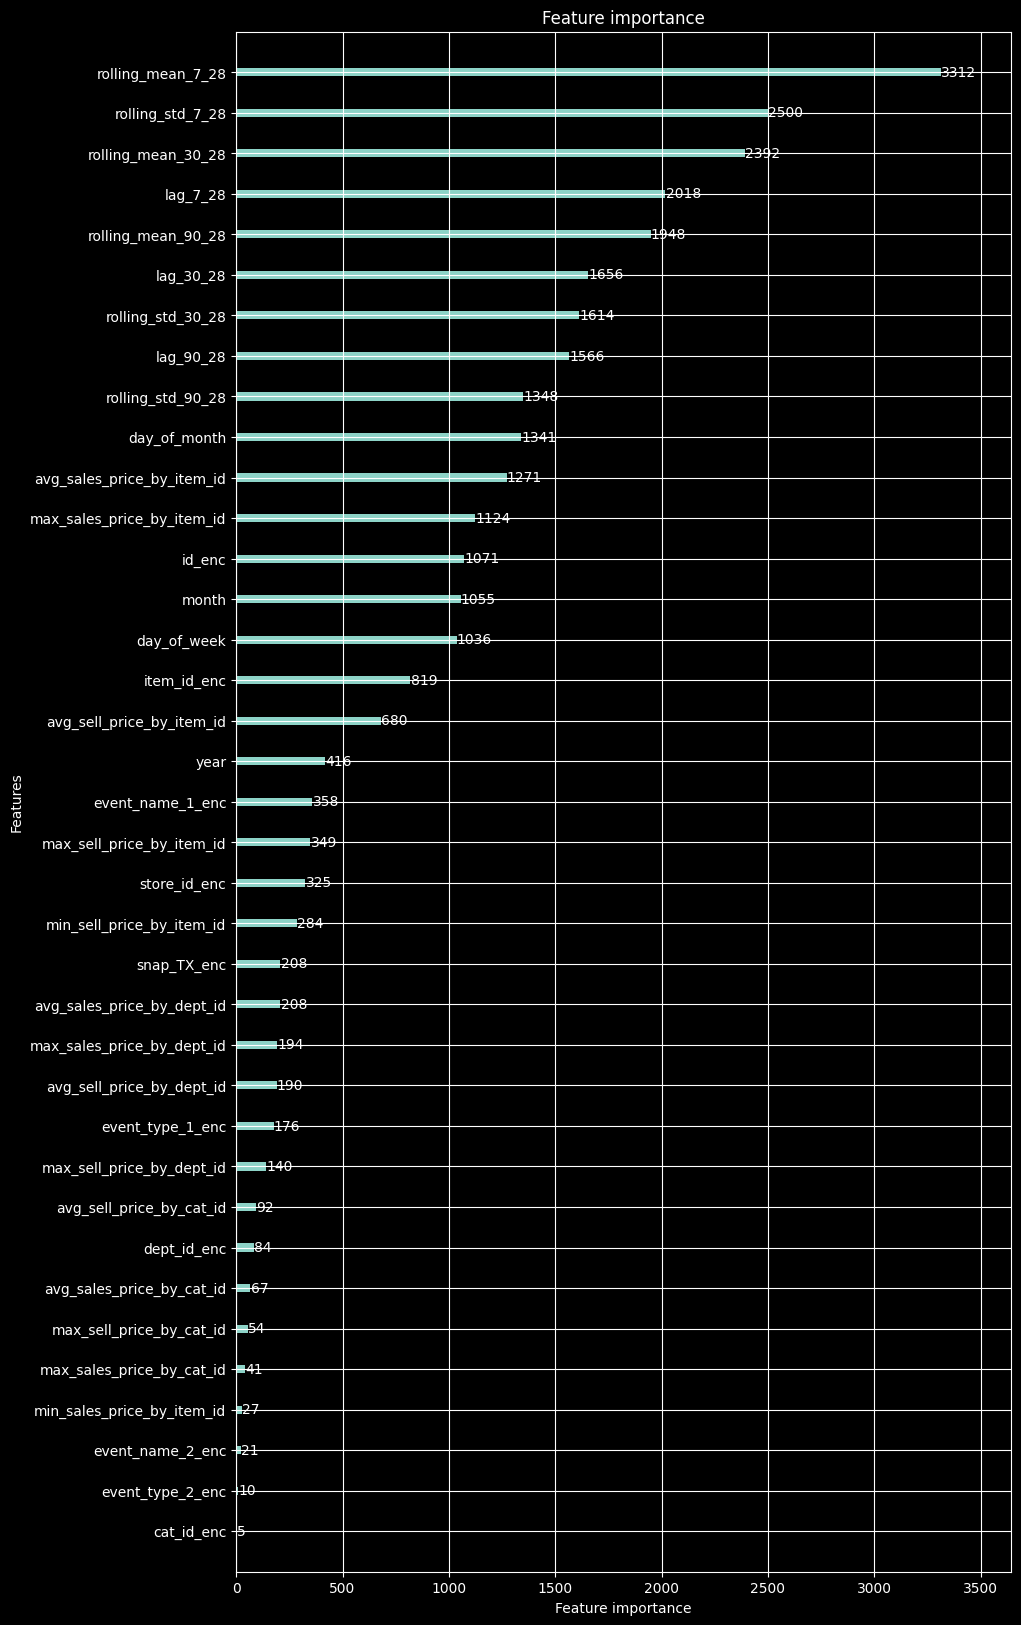

In [148]:
lgb.plot_importance(model, importance_type='auto', figsize=(10, 20), max_num_features=100)

In [149]:
# QUESTION: implement rmsse

def rmsse(train, val, y_pred):
    
    n = train.index.get_level_values('id').value_counts().unique()[0]
    h = val.index.get_level_values('id').value_counts().unique()[0]
    dof = 1 / (n-1)
    
    train_df = (
        train
        .groupby('id', group_keys=True)
        .apply(lambda df: np.sum((df.sales - df.sales.shift(1)) ** 2))
        .rename('mse_naive')
        .to_frame()
        .query('mse_naive > 0')
    )
    
    val_df = ((val.sales - preds)**2).rename('mse_val').to_frame().reset_index().drop('date', axis=1).groupby('id').sum()
    
    rmsse_df = (
        train_df
        .merge(val_df, on='id', how='left')
        .assign(
            denominator = lambda df: df.mse_naive * dof,
            numerator   = lambda df: df.mse_val / h
        )
        .assign(rmsse = lambda df: np.sqrt(df.numerator / df.denominator))
        .drop(['mse_naive', 'mse_val', 'denominator', 'numerator'], axis=1)
    )
    
    overall_rmsse = rmsse_df.rmsse.mean(skipna=True)
    
    return rmsse_df, overall_rmsse

In [150]:
rmsse_df, overall_rmsse = rmsse(train, val, preds)

display(rmsse_df)
print(f"Overall RMSSE: {overall_rmsse}")

,rmsse
id,
FOODS_1_001_TX_1_evaluation,1.153061
FOODS_1_001_TX_2_evaluation,1.416487
FOODS_1_001_TX_3_evaluation,0.264837
FOODS_1_002_TX_1_evaluation,0.206343
FOODS_1_002_TX_2_evaluation,0.387166
...,...
HOUSEHOLD_2_515_TX_2_evaluation,3.264675
HOUSEHOLD_2_515_TX_3_evaluation,0.002023
HOUSEHOLD_2_516_TX_1_evaluation,0.000000


Overall RMSSE: 0.6891476782763135
